In [ ]:
import os
import cv2
import numpy as np
import zipfile
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers
from keras.optimizers import Adam


asim = 5

# Define the path to your dataset
data_dir = 'Fer2013'
emotion_labels = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

# Function to extract zip files
def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

extract_zip('/content/drive/MyDrive/Data/Fer2013.zip', 'Fer2013')

def load_images(data_dir, emotion_labels):
    images = []
    labels = []

    for dataset_type in ['train', 'test']:
        for emotion, label in emotion_labels.items():
            emotion_dir = os.path.join(data_dir, dataset_type, emotion)
            for img_name in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (48, 48))
                    img = np.expand_dims(img, axis=-1)
                    images.append(img)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=len(emotion_labels))

    return images, labels

# Load images from both train and test folders
x_data, y_data = load_images(data_dir, emotion_labels)

# Normalize images
x_data = x_data.astype('float32') / 255.0

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications import VGG16

# Assuming x_train and x_test are your grayscale images with shape (num_samples, 48, 48, 1)
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)

# Define emotion labels (assuming a list of emotion categories)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def create_model(input_shape=(48, 48, 3)):  # Modified input shape
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    model = Sequential()
    model.add(vgg_base)

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(len(emotion_labels), activation='softmax'))

    return model


# Define a learning rate scheduler function
def learningRate_scheduler(epoch, lr):
    # Decrease learning rate for first 10 epochs
    if epoch < 10:
        return 0.001
    # Use lower learning rate for remaining epochs
    else:
        return 0.0001

# Create the learning rate scheduler callback
learningRate_schedule = LearningRateScheduler(learningRate_scheduler)

model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


NameError: name 'x_train' is not defined

In [ ]:
import numpy as np

# Assuming x_train and x_test are your grayscale images with shape (num_samples, 48, 48, 1)
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)


In [ ]:
# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train_rgb, y_train, epochs=30, batch_size=128, validation_data=(x_test_rgb, y_test), callbacks=[early_stopping])

Epoch 1/30
  1/225 [..............................] - ETA: 1:07:36 - loss: 2.3658 - accuracy: 0.1328

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

225/225 [==============================] - 1s 6ms/step - loss: 1.2674 - accuracy: 0.5520
Test loss: 1.267409324645996
Test accuracy: 0.5519643425941467


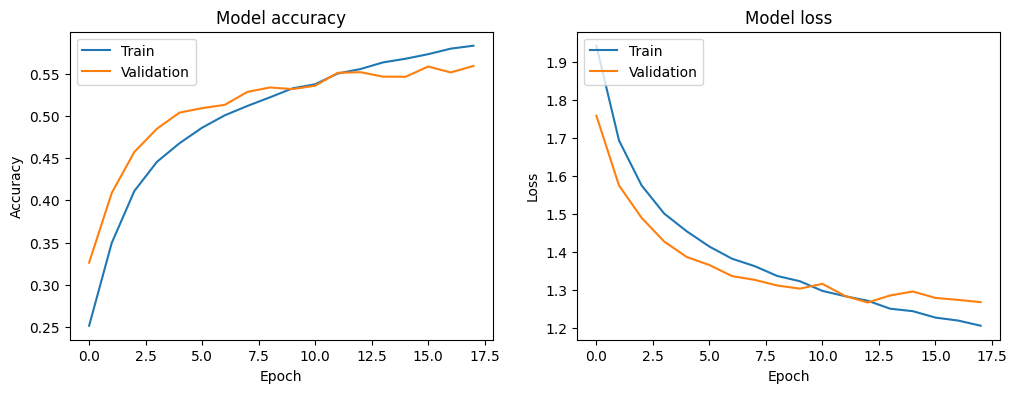

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Define emotion labels (assuming a list of emotion categories)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def create_model():
    model = Sequential()

    model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(64, (3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # Uncommented layers if needed in the future
    # model.add(Conv2D(128, (3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))

    model.add(Dense(len(emotion_labels), activation='softmax'))

    return model

def learningRate_scheduler(epoch):
    # Decrease learning rate for first 10 epochs
    if epoch < 10:
        return 0.001
    # Use lower learning rate for remaining epochs
    else:
        return 0.0001

model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Create the learning rate scheduler callback
learningRate_schedule = LearningRateScheduler(learningRate_scheduler)

# Assuming you have training data in variables `x_train` and `y_train`
# and validation data in `x_val` and `y_val`
# model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[learningRate_schedule])

# To avoid errors, I am commenting out the fitting line. Uncomment and modify accordingly.
